# Roller Coaster

## Overview

In this project three different datasets, regarding roller coasters around the world will be explored. 

## Project Goals

The main goal of this project is to create multiple visualizations in order to further understand the world of roller coasters. In this context aspect like ranking, structure, shape, size und more will be compared and visualized.



### Import relevant libraries and load the csv files into respective Dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style 

style.use('seaborn-dark')

wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

### Inspecting the Data

In [2]:
print(wood.head())
print(wood.count())
print(wood.describe())
print(wood.columns)
print(wood.dtypes)
print("--------------------------")
print(steel.head())
print(steel.count())
print(steel.describe())
print(steel.columns)
print(steel.dtypes)

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
Rank            180
Name            180
Park            180
Location        180
Supplier        179
Year Built      180
Points          180
Year of Rank    180
dtype: int64
             Rank   Year Built       Points  Year of

### Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster’s name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization. 
 

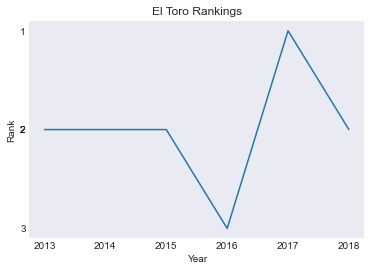

<Figure size 432x288 with 0 Axes>

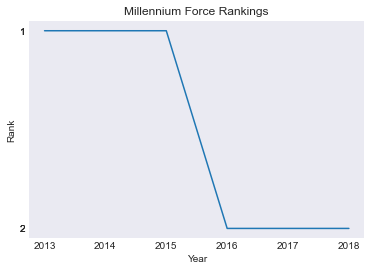

<Figure size 432x288 with 0 Axes>

In [3]:
def plot_rc(rollercoaster, dataframe, parkname):
    coaster_rankings = dataframe[(dataframe["Name"] == rollercoaster) & (dataframe["Park"]== parkname)]
    fig, ax = plt.subplots()
    ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'])
    ax.set_xticks(coaster_rankings['Year of Rank'].values)
    ax.set_yticks(coaster_rankings['Rank'].values)
    ax.invert_yaxis()
    plt.title("{} Rankings".format(rollercoaster))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.show()
    plt.clf()
    
#Test the function:
plot_rc('El Toro', wood, 'Six Flags Great Adventure')
plot_rc('Millennium Force',steel,'Cedar Point')

### Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters’ names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

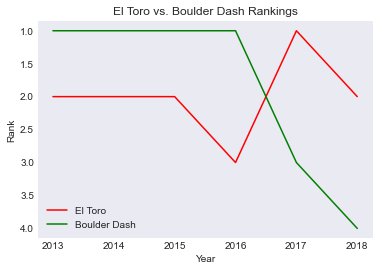

<Figure size 432x288 with 0 Axes>

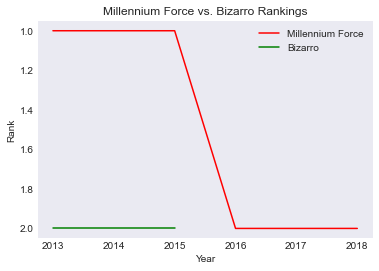

<Figure size 432x288 with 0 Axes>

In [4]:
def plot_rc_2(rollercoaster_1, parkname_1, rollercoaster_2, parkname_2, dataframe):
    coaster_rankings_1 = dataframe[(dataframe["Name"] == rollercoaster_1) & (dataframe["Park"]== parkname_1)]
    coaster_rankings_2 = dataframe[(dataframe["Name"] == rollercoaster_2) & (dataframe["Park"]== parkname_2)]
    fig, ax = plt.subplots()
    ax.plot(coaster_rankings_1['Year of Rank'], coaster_rankings_1['Rank'], color = 'red', label = rollercoaster_1)
    ax.plot(coaster_rankings_2['Year of Rank'], coaster_rankings_2['Rank'], color = 'green', label = rollercoaster_2)
    ax.invert_yaxis()
    plt.title("{} vs. {} Rankings".format(rollercoaster_1, rollercoaster_2))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.legend()
    plt.show()
    plt.clf()

#Test the function:
plot_rc_2('El Toro', 'Six Flags Great Adventure', 'Boulder Dash','Lake Compounce', wood)
plot_rc_2('Millennium Force','Cedar Point', 'Bizarro', 'Six Flags New England', steel)

### Write a function that will plot the ranking of the top n ranked roller coasters over time as lines. Your function should take a number n and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

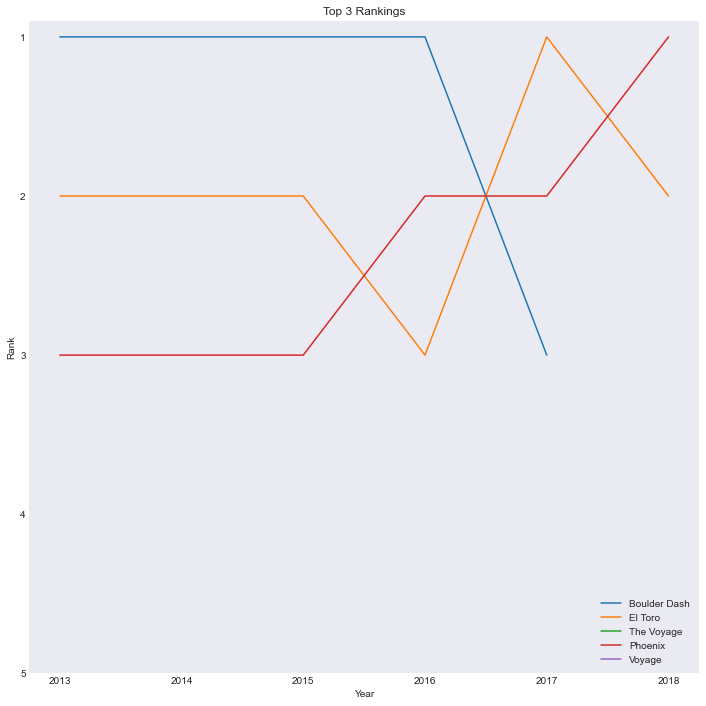

<Figure size 432x288 with 0 Axes>

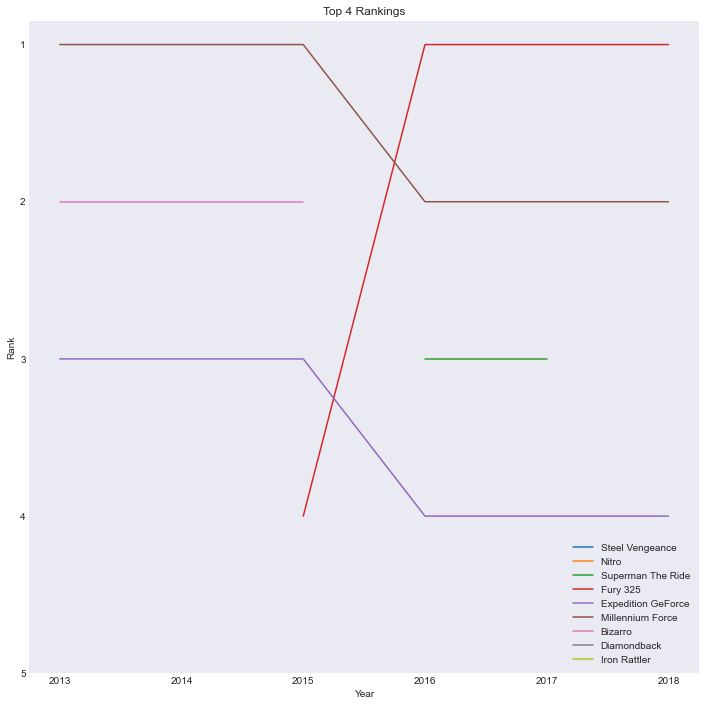

<Figure size 432x288 with 0 Axes>

In [5]:
def plot_n_rc(n, dataframe):
    top_n_rankings = dataframe[dataframe['Rank'] <= n]
    fig, ax = plt.subplots(figsize=(12,12))
    for rollercoaster in set(top_n_rankings['Name']):
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == rollercoaster]
        ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=rollercoaster)
    ax.set_yticks([i for i in range(1,6)])
    ax.invert_yaxis()
    plt.title("Top {} Rankings".format(n))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.legend(loc = 4)
    plt.show()
    plt.clf()

#Test the function:
plot_n_rc(3, wood)
plot_n_rc(4, steel)

### Now that you’ve visualized rankings over time, let’s dive into the actual statistics of roller coasters themselves. Captain Coaster is a popular site for recording roller coaster information. Data on all roller coasters documented on. Captain Coaster has been accessed through its API and stored in roller_coasters.csv. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [6]:
rc = pd.read_csv('roller_coasters.csv')
print(rc.head())
print(rc.count())
print(rc.describe())
print(rc.columns)
print(rc.dtypes)

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  
name              2799
material_type     2802
seating_type      2802
speed             1478
height            1667
length            1675
num_inversions 


### Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.


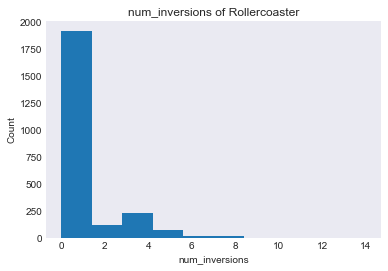

<Figure size 432x288 with 0 Axes>

In [7]:
def plt_hist(dataframe, column_name):
    hist_data = dataframe[column_name].dropna()
    plt.hist(hist_data)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title('{} of Rollercoaster'.format(column_name))
    plt.show()
    plt.clf()
    
#Test the function:
plt_hist(rc, "num_inversions")


### Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

<ipython-input-8-05d895504e96>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


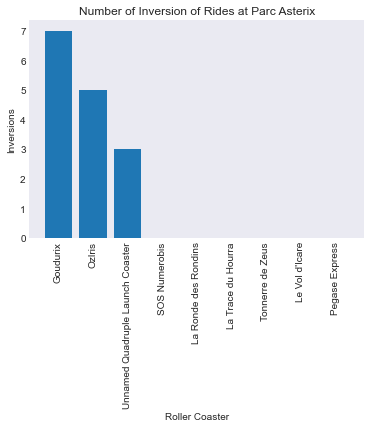

<Figure size 432x288 with 0 Axes>

In [8]:
def plt_bar(dataframe, park_name):
    rollercoasters = dataframe[dataframe['park'] == park_name].sort_values('num_inversions', ascending=False)
    names = rollercoasters['name']
    inversions = rollercoasters['num_inversions']
    plt.bar(names, inversions)
    ax = plt.subplot()
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names,rotation=90)
    plt.title("Number of Inversion of Rides at {}".format(park_name))
    plt.xlabel('Roller Coaster')
    plt.ylabel('Inversions')
    plt.show()
    plt.clf()

#Test the function:
plt_bar(rc, 'Parc Asterix')

### Write a function that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely'). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

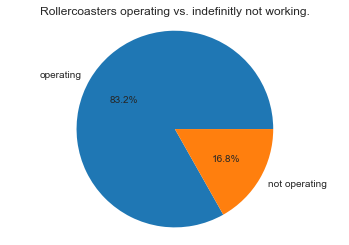

<Figure size 432x288 with 0 Axes>

In [9]:
def plt_pie(dataframe):
    operating = len(dataframe[dataframe.status == 'status.operating'])
    not_operating = len(dataframe[dataframe.status == 'status.closed.definitely'])
    status = [operating,not_operating]
    labels =['operating','not operating']
    plt.pie(status, labels = labels,autopct='%0.1f%%')
    plt.title('Rollercoasters operating vs. indefinitly not working.')
    plt.axis('equal')
    plt.show()
    plt.clf()

#Test the function:
plt_pie(rc)

### Write a function that creates a scatter plot of speed vs height of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.

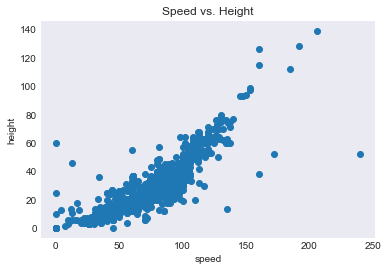

<Figure size 432x288 with 0 Axes>

In [10]:
def plot_scatter(dataframe, column_1, column_2):
    dataframe = dataframe[dataframe['height'] < 140]
    plt.scatter(dataframe[column_1], dataframe[column_2])
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.title('Speed vs. Height')
    plt.show()
    plt.clf()

#Test the function:
plot_scatter(rc,'speed','height')


## Conclusion

Through the use of several EDA techniques the data has become significantly more understandable. many specific questions regarding certain roller coasters can be answered, simply by putting the relevant roller coasters into the code above. 